In [20]:
import sys
import numpy as np
import pandas as pd
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, root_mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset



In [14]:
df = pd.read_excel('employee_training_metrics_large.xlsx')
df

,employee_id,module_id,date_assigned,date_started,date_completed,time_taken,number_of_attempts,average_quiz_score,property_location,guest_feedback_score
0,E0128,M017,2023-04-13,2023-04-16,2023-04-24,43,1,80.19,Los Angeles,5
1,E0141,M017,2023-06-01,2023-06-03,2023-06-09,75,1,79.33,Dallas,6
2,E0756,M012,2023-05-10,2023-05-13,2023-05-18,82,1,92.39,Los Angeles,7
3,E0135,M016,2023-06-19,2023-06-22,2023-06-25,54,4,80.07,Seattle,6
4,E0644,M006,2023-03-30,2023-04-02,2023-04-04,58,1,76.67,Miami,6
...,...,...,...,...,...,...,...,...,...,...
4995,E0677,M015,2023-04-15,2023-04-19,2023-04-23,10,3,90.65,Dallas,5
4996,E0018,M007,2023-05-09,2023-05-11,2023-05-18,47,4,80.40,Miami,5
4997,E0629,M003,2023-05-06,2023-05-07,2023-05-11,40,2,100.00,New York,7
4998,E0136,M015,2023-01-03,2023-01-07,2023-01-11,69,5,86.58,Denver,6


In [15]:
# Feature Engineering: Calculate training duration in days
df['date_assigned'] = pd.to_datetime(df['date_assigned'])
df['date_started'] = pd.to_datetime(df['date_started'])
df['date_completed'] = pd.to_datetime(df['date_completed'])
df['training_duration'] = (df['date_completed'] - df['date_started']).dt.days

df

,employee_id,module_id,date_assigned,date_started,date_completed,time_taken,number_of_attempts,average_quiz_score,property_location,guest_feedback_score,training_duration
0,E0128,M017,2023-04-13,2023-04-16,2023-04-24,43,1,80.19,Los Angeles,5,8
1,E0141,M017,2023-06-01,2023-06-03,2023-06-09,75,1,79.33,Dallas,6,6
2,E0756,M012,2023-05-10,2023-05-13,2023-05-18,82,1,92.39,Los Angeles,7,5
3,E0135,M016,2023-06-19,2023-06-22,2023-06-25,54,4,80.07,Seattle,6,3
4,E0644,M006,2023-03-30,2023-04-02,2023-04-04,58,1,76.67,Miami,6,2
...,...,...,...,...,...,...,...,...,...,...,...
4995,E0677,M015,2023-04-15,2023-04-19,2023-04-23,10,3,90.65,Dallas,5,4
4996,E0018,M007,2023-05-09,2023-05-11,2023-05-18,47,4,80.40,Miami,5,7
4997,E0629,M003,2023-05-06,2023-05-07,2023-05-11,40,2,100.00,New York,7,4
4998,E0136,M015,2023-01-03,2023-01-07,2023-01-11,69,5,86.58,Denver,6,4


In [17]:

# Drop unused columns
df_model = df.drop(columns=['employee_id', 'module_id', 'date_assigned', 'date_started', 'date_completed'])
df_model


,time_taken,number_of_attempts,average_quiz_score,property_location,guest_feedback_score,training_duration
0,43,1,80.19,Los Angeles,5,8
1,75,1,79.33,Dallas,6,6
2,82,1,92.39,Los Angeles,7,5
3,54,4,80.07,Seattle,6,3
4,58,1,76.67,Miami,6,2
...,...,...,...,...,...,...
4995,10,3,90.65,Dallas,5,4
4996,47,4,80.40,Miami,5,7
4997,40,2,100.00,New York,7,4
4998,69,5,86.58,Denver,6,4


Random Forest Evaluation:
MAE: 0.8740
RMSE: 1.1040
R²: 0.2908
------------------------------
XGBoost Evaluation:
MAE: 0.9245
RMSE: 1.1666
R²: 0.2081
------------------------------


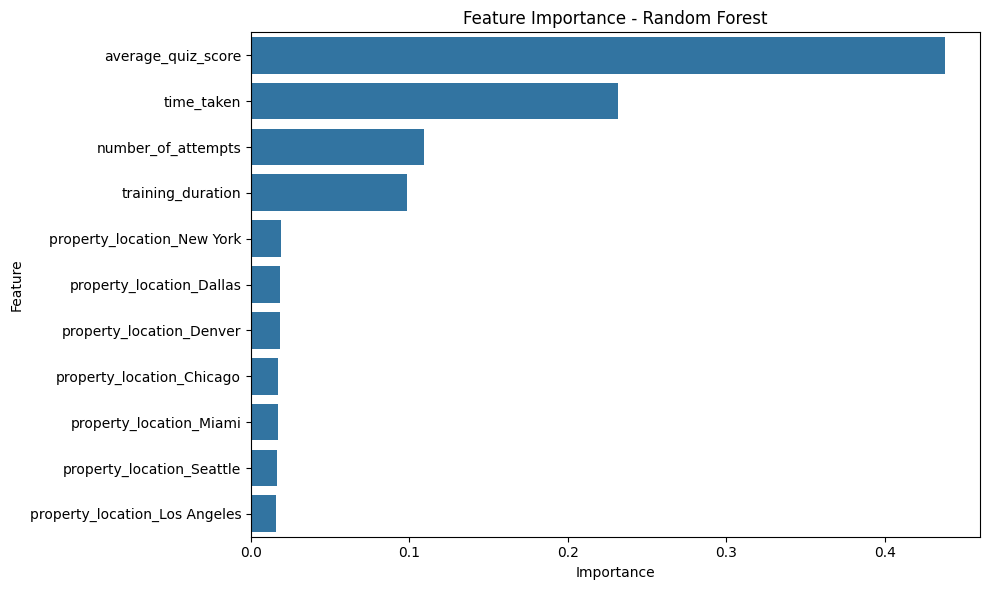

In [22]:

# Drop unused columns
df_model = df.drop(columns=['employee_id', 'module_id', 'date_assigned', 'date_started', 'date_completed'])

# One-hot encode property_location
df_model = pd.get_dummies(df_model, columns=['property_location'], drop_first=True)

# Define features and target
X = df_model.drop(columns=['guest_feedback_score'])
y = df_model['guest_feedback_score']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest Regressor
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)
rf_preds = rf_model.predict(X_test)

# Train XGBoost Regressor
xgb_model = XGBRegressor(random_state=42, verbosity=0)
xgb_model.fit(X_train, y_train)
xgb_preds = xgb_model.predict(X_test)

# Evaluation function
def evaluate_model(name, y_true, y_pred):
    print(f"{name} Evaluation:")
    print(f"MAE: {mean_absolute_error(y_true, y_pred):.4f}")
    print(f"RMSE: {root_mean_squared_error(y_true, y_pred):.4f}")
    print(f"R²: {r2_score(y_true, y_pred):.4f}")
    print("-" * 30)

#Evaluate both models
evaluate_model("Random Forest", y_test, rf_preds)
evaluate_model("XGBoost", y_test, xgb_preds)

# Feature importance visualization for Random Forest
importances = rf_model.feature_importances_
features = X.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title("Feature Importance - Random Forest")
plt.tight_layout()
plt.show()


In [25]:
def prepare_input(time_taken, number_of_attempts, average_quiz_score, training_duration, location, all_locations):
    input_data = {
        'time_taken': time_taken,
        'number_of_attempts': number_of_attempts,
        'average_quiz_score': average_quiz_score,
        'training_duration': training_duration,
    }
    # Set all location columns to 0
    for loc in all_locations:
        input_data[loc] = 1 if loc == f'property_location_{location}' else 0
    return pd.DataFrame([input_data])


In [38]:
# Assume these are the one-hot encoded location columns from training
location_columns = [col for col in X.columns if col.startswith('property_location_')]

# Prepare input
sample_input = prepare_input(
    time_taken=9,
    number_of_attempts=4,
    average_quiz_score=90,
    training_duration=100,
    location='Los Angeles',
    all_locations=location_columns
)

# Predict
predicted_score = rf_model.predict(sample_input)[0]
print(f"Predicted guest feedback score: {predicted_score:.2f}")

p2 = xgb_model.predict(sample_input)[0]
print(f"Predicted guest feedback score: {p2}")


Predicted guest feedback score: 6.28
Predicted guest feedback score: 6.3016743659973145


In [ ]:
print(rf_model.d)